# ---------------------------------------Stock Market Analyser------------------------------------

                        To se the Live Demo of Stock Market Analyser go tho the bottom of the page 

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
def pred(stock_name):
    #use the stock you want to analyse from above
    file_path = f"data/{stock_name}.csv"

    # Read the CSV file using pandas
    try:
      df = pd.read_csv(file_path)
    except FileNotFoundError:
      print(f"Error: File '{file_path}' not found. Please check the file path.")
    
    import matplotlib.pyplot as plt
    df.plot(x = 'Date',y = 'Close', color = ['r'], figsize = [20,5])
    
    df["Tomorrow"] = df["Close"].shift(-1)
    df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
    
    del df["Trades"]
    del df["Deliverable Volume"]
    del df["%Deliverble"]
    del df["Series"]
    del df["Symbol"]
    
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
    train = df.iloc[:-100]
    test = df.iloc[-100:]
    predictors = ["Prev Close", "Open", "High", "Low", "Last", "Close", "VWAP", "Volume", "Turnover"]
    model.fit(train[predictors], train["Target"])
    
    from sklearn.metrics import precision_score
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index)
    a = precision_score(test["Target"], preds)
    
    BOLD = "\033[1m"
    END = "\033[0m"
    print(f"The stock {BOLD}{stock_name}{END} went {BOLD}{a*100}%{END} of the time the model predicted")

In [3]:
def overview(stock_name):
    #use the stock you want to analyse from above
    file_path = f"data/{stock_name}.csv"

    # Read the CSV file using pandas
    try:
      df = pd.read_csv(file_path)
    except FileNotFoundError:
      print(f"Error: File '{file_path}' not found. Please check the file path.")
    
    df["Tomorrow"] = df["Close"].shift(-1)
    df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
    
    del df["Trades"]
    del df["Deliverable Volume"]
    del df["%Deliverble"]
    del df["Series"]
    del df["Symbol"]
    
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
    train = df.iloc[:-100]
    test = df.iloc[-100:]
    predictors = ["Prev Close", "Open", "High", "Low", "Last", "Close", "VWAP", "Volume", "Turnover"]
    model.fit(train[predictors], train["Target"])
    
    from sklearn.metrics import precision_score
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index)
    a = precision_score(test["Target"], preds)
    
    BOLD = "\033[1m"
    END = "\033[0m"
    print(f"{stock_name}--------------------------->{a*100}%")

# --------------------------------------------OUTPUT----------------------------------------------

Stocks to analyse:

NIFTY50_all, ADANIPORTS, ASIANPAINT, AXISBANK, BAJAJ-AUTO, BAJAJFINSV, BAJFINANCE, BHARTIARTL, BPCL, BRITANNIA, CIPLA, COALINDIA, DRREDDY, EICHERMOT, GAIL, GRASIM, HCLTECH, HDFC, HDFCBANK, HEROMOTOCO, HINDALCO, HINDUNILVR, ICICIBANK, INDUSINDBK, INFRATEL, INFY, IOC, ITC, JSWSTEEL, KOTAKBANK, LT, MARUTI, MM, NESTLEIND, NTPC, ONGC, POWERGRID, RELIANCE, SBIN, SHREECEM, SUNPHARMA, TATAMOTORS, TATASTEEL, TCS, TECHM, TITAN, ULTRACEMCO, UPL, VEDL, WIPRO, ZEEL.

Name A Stock from the list above to analyse: TCS
The stock TCS went 43.42105263157895% of the time the model predicted


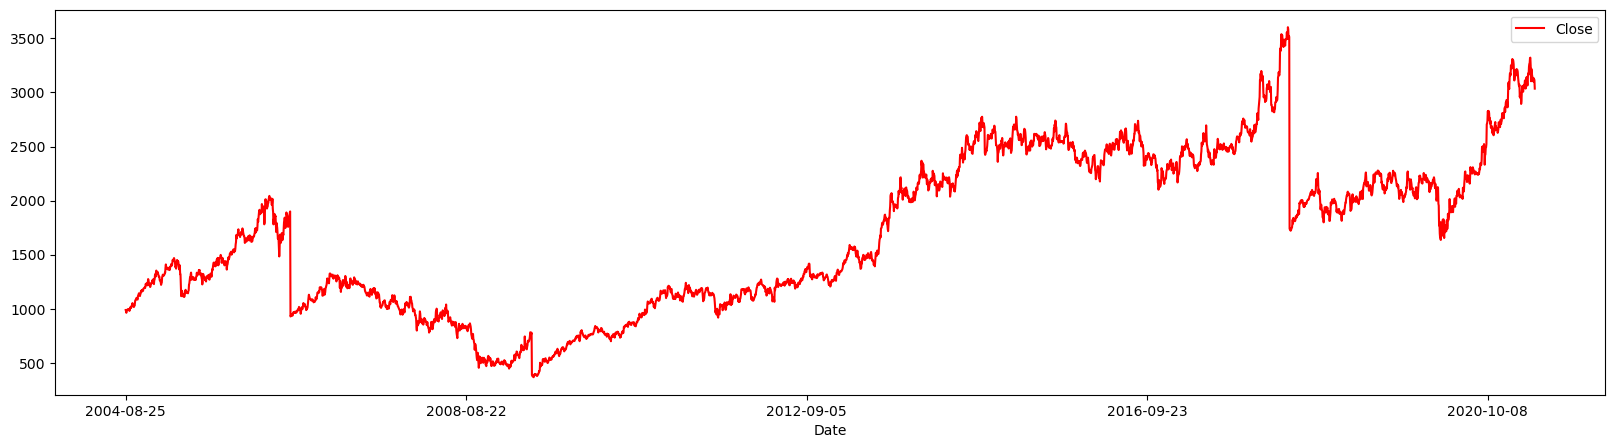

In [4]:
stock_name = input("Name A Stock from the list above to analyse: ")
pred(stock_name)

In [5]:
stock_names = [
    "ADANIPORTS", "ASIANPAINT", "AXISBANK", "BAJAJFINSV", "BAJFINANCE",
    "BHARTIARTL", "BPCL", "BRITANNIA", "CIPLA", "COALINDIA", "DRREDDY", "EICHERMOT", "GAIL",
    "GRASIM", "HCLTECH", "HDFC", "HDFCBANK", "HEROMOTOCO", "HINDALCO", "HINDUNILVR",
    "ICICIBANK", "INDUSINDBK", "ITC", "JSWSTEEL", "KOTAKBANK",
    "LT", "MARUTI", "MM", "NESTLEIND", "NTPC", "ONGC", "POWERGRID", "RELIANCE", "SBIN",
    "SHREECEM", "SUNPHARMA", "TATASTEEL", "TCS", "TECHM", "TITAN", "ULTRACEMCO",
    "UPL", "VEDL", "WIPRO", "ZEEL"
]
i = 1
for stock_name in stock_names:
    print(i, end=". ")
    overview(stock_name)
    i+=1

1. ADANIPORTS--------------------------->70.0%
2. ASIANPAINT--------------------------->55.12820512820513%
3. AXISBANK--------------------------->66.66666666666666%
4. BAJAJFINSV--------------------------->48.837209302325576%
5. BAJFINANCE--------------------------->53.84615384615385%
6. BHARTIARTL--------------------------->50.0%
7. BPCL--------------------------->63.63636363636363%
8. BRITANNIA--------------------------->42.5%
9. CIPLA--------------------------->75.0%
10. COALINDIA--------------------------->58.333333333333336%
11. DRREDDY--------------------------->47.05882352941176%
12. EICHERMOT--------------------------->47.87234042553192%
13. GAIL--------------------------->47.72727272727273%
14. GRASIM--------------------------->90.0%
15. HCLTECH--------------------------->53.333333333333336%
16. HDFC--------------------------->52.94117647058824%
17. HDFCBANK--------------------------->38.88888888888889%
18. HEROMOTOCO--------------------------->46.875%
19. HINDALCO------------